In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

**Chuẩn bị thư viện Ipywidgets**

In [2]:
# Cài đặt (nếu chưa có sẵn)
#%pip install ipywidgets

In [3]:
import ipywidgets as widgets

# 1. Giới thiệu

**Review: Linear Regression với y=ax+b**

In [4]:
# Linear Regression voi y = ax + b
a = 3
b = np.random.normal(0,2,200)
x = np.linspace(0,10,200)
y = a*x + b
y.size

200

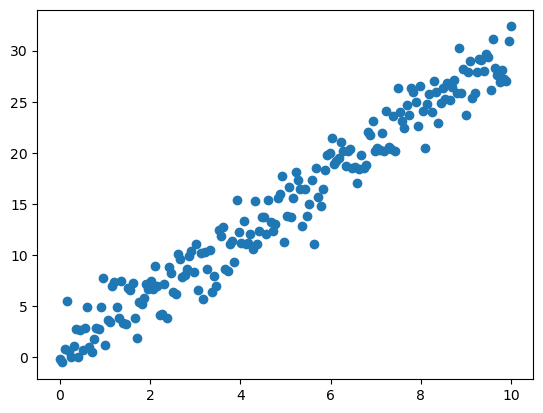

In [5]:
# Vẽ lên biểu đồ scatter
plt.scatter(x=x,y=y)
plt.show()

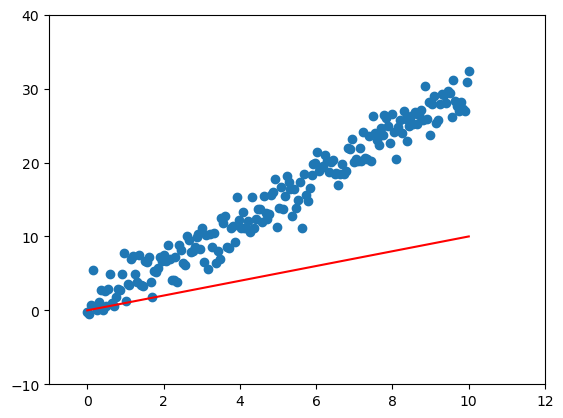

In [6]:
# Tạo hàm vẽ thêm đường tuyến tính
def Ve_Ham_So(aa=2, bb = 0):
    # Vẽ các điểm dữ liệu
    plt.scatter(x=x,y=y)
    
    # Vẽ đường hồi quy: giả sử bb=0
    xx = np.array([0,10])
    yy = xx*aa + bb
    plt.plot(xx, yy, color='red')
    
    plt.xlim([-1,12])
    plt.ylim([-10,40])
    plt.show()
    plt.close('all')
Ve_Ham_So(1, 0)

**Tự tìm giá trị cho a và b**

In [7]:
w = widgets.interact(Ve_Ham_So, aa=(0,5,0.2), bb=(-5,5,0.5))

interactive(children=(FloatSlider(value=2.0, description='aa', max=5.0, step=0.2), FloatSlider(value=0.0, desc…

**Cho phép bật/tắt, chọn màu cho đường tuyến tính + Thêm Text tùy ý**

In [8]:
def Ve_Ham_So2(aa=2, bb=0, cc='r', show_line=True, text='Linear Regression'):
    xx = np.array([0,10])
    yy = xx*aa + bb
    plt.scatter(x=x,y=y)
    
    if show_line:
        plt.plot(xx, yy, color=cc)
    plt.annotate(text, (0, 35))
    
    plt.xlim([-1,12])
    plt.ylim([-10,40])
    plt.show()
    plt.close('all')

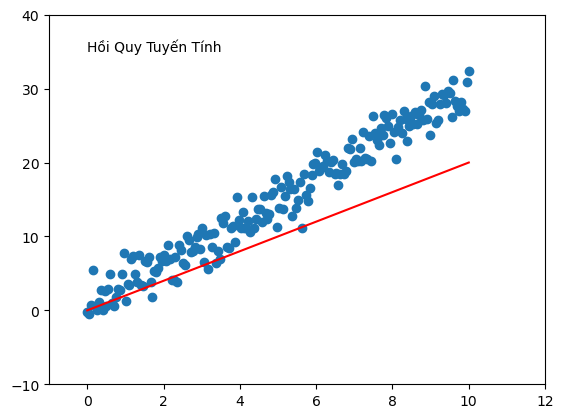

In [9]:
Ve_Ham_So2(text="Hồi Quy Tuyến Tính")

In [10]:
w = widgets.interact(Ve_Ham_So2, 
                     aa=(0,5,0.2), 
                     bb=(-2,2,0.2), 
                     cc=['red', 'green', 'blue'],
                     show_line=False,
                    )

interactive(children=(FloatSlider(value=2.0, description='aa', max=5.0, step=0.2), FloatSlider(value=0.0, desc…

# 2. Các loại widgets thông dụng

Tham khảo: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [11]:
from IPython.display import display, clear_output

## 2.1. Slider

**Chọn giá trị kiểu `integer`**

In [12]:
widgets.IntSlider()

IntSlider(value=0)

In [13]:
w0 = widgets.IntSlider(value=3, min=-10, max=10, step=1)
display(w0)

IntSlider(value=3, max=10, min=-10)

**Chọn giá trị kiểu `float`**

In [14]:
w1 = widgets.FloatSlider(value=2.5, min=1.2, max=5.6, step=0.2)
display(w1)

FloatSlider(value=2.5, max=5.6, min=1.2, step=0.2)

**Tạo biến trỏ đến widget để lấy ra kết quả**

In [15]:
gia_tri = w1.value
print(gia_tri)

2.5


**HBox và VBox**

In [16]:
widgets.HBox([w0,w1])

In [17]:
widgets.VBox([w0,w1])

## 2.2. Textbox & Label

**Một số widgets cơ bản để nhập liệu**

In [18]:
widgets.IntText(value=10, step=3)

IntText(value=10, step=3)

In [19]:
widgets.BoundedIntText(value=3, min=-3, max=6, step=1)

BoundedIntText(value=3, max=6, min=-3)

In [20]:
widgets.FloatText(value=2.3, step=0.5)

FloatText(value=2.3, step=0.5)

In [21]:
widgets.BoundedFloatText(description='Nhập số Thực:', 
                         min=1.2, max=5.6, step=0.2
                        )

BoundedFloatText(value=1.2, description='Nhập số Thực:', max=5.6, min=1.2, step=0.2)

**Tạo biến trỏ đến widget để lấy ra kết quả**

In [22]:
# Thêm description
# Lưu ý: Cần set tham số style để hiển thị được description dài
w2 = widgets.BoundedFloatText(description='Nhập số Thực:', 
                              min=1.2, max=5.6, step=0.2,
                              style = {'description_width': 'initial'},
                             )
display(w2)

BoundedFloatText(value=1.2, description='Nhập số Thực:', max=5.6, min=1.2, step=0.2, style=DescriptionStyle(de…

In [23]:
# Lấy ra kết quả đã nhập
print(w2.value)

1.2


**Kết hợp 2 widgets bằng `.link`, `.dlink` hoặc `.jslink`**
1. .link và .dlink: Python kernel, sẽ không hoạt động sau khi tắt kernel
2. .jslink: Javascript (client), vẫn chạy sau khi tắt kernel

In [24]:
# LƯU Ý: Nếu gọi display cho biến đã display rồi và dùng hàm link có thể 
# gây loop vô tận!!!
# Cần đặt tên biến mới (hoặc xóa biến cũ)

w3 = widgets.FloatSlider(value=2.5, min=1.2, max=5.6, step=0.2)
w4 = widgets.BoundedFloatText(description='Nhập số Thực:', 
                              min=1.2, max=5.6, step=0.2,
                              style = {'description_width': 'initial'},
                             )
widgets.link((w3, 'value'), (w4, 'value'))
display(w3,w4)

FloatSlider(value=2.5, max=5.6, min=1.2, step=0.2)

BoundedFloatText(value=2.5, description='Nhập số Thực:', max=5.6, min=1.2, step=0.2, style=DescriptionStyle(de…

In [25]:
# Sử dụng jslink

w3 = widgets.FloatSlider(value=2.5, min=1.2, max=5.6, step=0.2)
w4 = widgets.BoundedFloatText(description='Nhập số Thực:', 
                              min=1.2, max=5.6, step=0.2,
                              style = {'description_width': 'initial'},
                             )
widgets.jslink((w3, 'value'), (w4, 'value'))
display(w3,w4)

FloatSlider(value=2.5, max=5.6, min=1.2, step=0.2)

BoundedFloatText(value=1.2, description='Nhập số Thực:', max=5.6, min=1.2, step=0.2, style=DescriptionStyle(de…

**TextBox và TextArea cho dữ liệu chuỗi**

In [26]:
# Ví dụ: nhập tên, password
wText1 = widgets.Text(value='abc', 
                      description='Nhập Text Vào Đây',                      
                      style = {'description_width': 'initial'}
                     )
display(wText1)

Text(value='abc', description='Nhập Text Vào Đây', style=DescriptionStyle(description_width='initial'))

In [27]:
# Lấy ra chuỗi đã nhập
print(wText1.value)

abc


In [28]:
wText2 = widgets.Textarea(value='abc \n xyz', 
                          description='Nhập Text Vào Đây',
                          style = {'description_width': 'initial'}
                         )
display(wText2)

Textarea(value='abc \n xyz', description='Nhập Text Vào Đây', style=DescriptionStyle(description_width='initia…

In [29]:
wText2.value

'abc \n xyz'

**Sử dụng `widgets.Label()` để tạo description**

In [30]:
wLabel = widgets.Label(value='Nhập Text Vào Đây')
wText2 = widgets.Textarea(value='abc \n xyz', continuous_update=True)
display(wLabel, wText2)

Label(value='Nhập Text Vào Đây')

Textarea(value='abc \n xyz')

In [31]:
# Sử dụng box để kết hợp Nhãn và Control
box1 = widgets.VBox([wLabel, wText2])
display(box1)

## 2.3. Checkbox & Radiobuttons

In [32]:
wCheckbox = widgets.Checkbox(value=True, description='Hiển thị')
display(wCheckbox)

Checkbox(value=True, description='Hiển thị')

In [33]:
# Lấy ra kết quả từ Checkbox
wCheckbox.value

True

In [34]:
wRB = widgets.RadioButtons(description='Ngành học của bạn',
                           options=['IT', 'Kinh Tế - Tài Chính', 
                                    'Kỹ thuật - Công nghệ', 'Khác']
                          )
display(wRB)

RadioButtons(description='Ngành học của bạn', options=('IT', 'Kinh Tế - Tài Chính', 'Kỹ thuật - Công nghệ', 'K…

In [35]:
# Lấy ra kết quả từ RadioButton
print(wRB.value)
print(wRB.index)

IT
0


## 2.4. Dropdown list

**Chỉ chọn 1 thành phần**

In [36]:
muc_tieu = ['Data Analyst', 'Data Scientist', 'Analytics Engineer', 'Biết DA Sơ Sơ', 'Biết Lập Trình Python', 'Tất cả']

wSelect = widgets.Select(description='Chọn Mục Tiêu Của Bạn',
                         label='Data Scientist', 
                         value='Data Analyst',
                         #row=6,
                         options=muc_tieu
                        )
display(wSelect)

Select(description='Chọn Mục Tiêu Của Bạn', index=1, options=('Data Analyst', 'Data Scientist', 'Analytics Eng…

In [37]:
# Lất ra kết quả
print(wSelect.value)
print(wSelect.index)

Data Scientist
1


**Chọn nhiều thành phần**

In [38]:
wSelectM = widgets.SelectMultiple(description='Chọn Chi Nhánh',
                                  options=['CN1', 'CN2', 'CN3', 'CN4', 'CN5'],
                                  value=['CN1'],
                                  row=3
                                 )
display(wSelectM)

SelectMultiple(description='Chọn Chi Nhánh', index=(0,), options=('CN1', 'CN2', 'CN3', 'CN4', 'CN5'), value=('…

In [39]:
print(wSelectM.index)
print(wSelectM.value)

(0,)
('CN1',)


## 2.5. Buttons

**Tạo button**

In [66]:
# button_style: 'success', 'info', 'warning', 'danger' or ''
wButton = widgets.Button(description='Chọn',
                         button_style='warning',
                         tooltip='Bấm vào đây',
                         #icon='check' # 
              )
display(wButton)

Button(button_style='warning', description='Chọn', style=ButtonStyle(), tooltip='Bấm vào đây')

**Tạo hàm thực hiện thao tác khi click**

In [41]:
# Hàm này bắt buộc phải nhận 1 tham số
def ThucHien(click):
    print("Tham số:", click)
    # clear_output()
    # display(wButton)
    print('Hello World')

In [42]:
ThucHien("")

Tham số: 
Hello World


**Tiến hành liên kết hàm và thao tác click**

In [43]:
wButton.on_click(ThucHien)

In [44]:
display(wButton)

Button(button_style='warning', description='Chọn', style=ButtonStyle(), tooltip='Bấm vào đây')

## 2.6. Output widgets

**Tạo một widget cho việc hiển thị kết quả**

In [45]:
wOutput = widgets.Output(layout={'border': '1px solid black', 'height':"200px", 'width': '400px'})
display(wOutput)

Output(layout=Layout(border='1px solid black', height='200px', width='400px'))

In [46]:
# Thử in một số text lên output đó và hiển thị button
with wOutput:
    wOutput.clear_output()
    print('abc')
    print('xyz')
    print('234')
    # display(wButton)

**Thử tạo một nút bấm để tác động lên output**

In [47]:
wButton2 = widgets.Button(description='Xóa',
                         button_style='info',
                         tooltip='Bấm vào đây',
                         #icon='check' # 
              )
# widgets.HBox([wButton2, wOutput])

In [48]:
# Tạo hàm xử lý việc chọn click: in lên output
def ThucHien2(click):
    wOutput.clear_output()
       
    with wOutput:
        print('Hello World')

# Liên kết hàm này với button
wButton2.on_click(ThucHien2)

In [49]:
widgets.HBox([wButton2, wOutput])

# 3. Hàm `widgets.interact()`

## 3.1. Tạo một `interact` đơn giản

In [67]:
@widgets.interact()
def Ve_Ham_So3(aa=2, bb=5, cc='r', show_line=False, text='Linear Regression'):
    xx = np.array([0,10])
    yy = xx*aa + bb
    sns.scatterplot(x=x,y=y)
    
    if show_line:
        sns.lineplot(x=xx, y=yy, color=cc)
    plt.annotate(text, (0, 35))
    
    plt.xlim([-1,12])
    plt.ylim([-10,40])
    plt.show()
    plt.close('all')

interactive(children=(IntSlider(value=2, description='aa', max=6, min=-2), IntSlider(value=5, description='bb'…

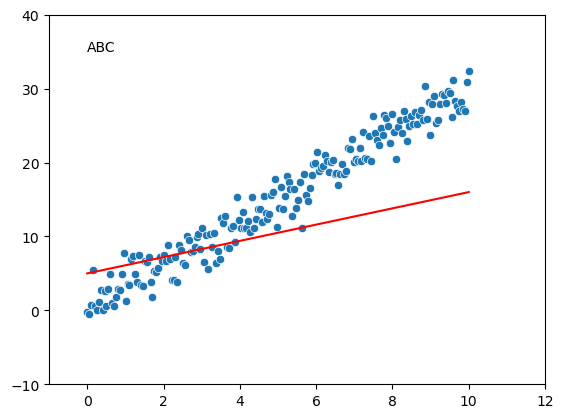

In [51]:
Ve_Ham_So3(aa=1.1, show_line = True, text='ABC')

## 3.2. Sử dụng `interact` cho từng widgets

(Thay các nhãn "aa", "bb", "cc"... được tạo ra tự động)

In [68]:
# 1. Tạo các widgets tương ứng
w1 = widgets.IntSlider(description='Int:', value=20, min=0, max=50, step=5)
w2 = widgets.FloatSlider(description='Float:', value=0.5, min=0, max=1, step=0.02)
w3 = widgets.SelectMultiple(description='Chọn Chi Nhánh',
                                  options=['CN1', 'CN2', 'CN3', 'CN4', 'CN5'],
                                  value=['CN1'],
                                  row=3
                                 )
display(w1, w2, w3)

IntSlider(value=20, description='Int:', max=50, step=5)

FloatSlider(value=0.5, description='Float:', max=1.0, step=0.02)

SelectMultiple(description='Chọn Chi Nhánh', index=(0,), options=('CN1', 'CN2', 'CN3', 'CN4', 'CN5'), value=('…

In [69]:
# Tạo hàm tương ứng
def InKetQua(thamso1=1, thamso2=1.1, thamso3='abc'):
    print("Tham số 1:", thamso1)
    print("Tham số 2:", thamso2)
    print("Tham số 3:", thamso3)
    
    a = thamso1 + thamso2
    print("Tổng của tham số 1 và 2:", a)
    
InKetQua()

Tham số 1: 1
Tham số 2: 1.1
Tham số 3: abc
Tổng của tham số 1 và 2: 2.1


In [54]:
# Thực hiện liên kết hàm trên và các widgets tương ứng các tham số
widgets.interact(InKetQua, thamso1=w1, thamso2=w2, thamso3=w3)

interactive(children=(IntSlider(value=20, description='Int:', max=50, step=5), FloatSlider(value=0.5, descript…

<function __main__.InKetQua(thamso1=1, thamso2=1.1, thamso3='abc')>

**Lựa chọn các tham số cho các widgets**

In [55]:
# Thay đổi tham số đầu tiên, fix 2 tham số còn lại
wInteract1 = widgets.interact(InKetQua, 
                              thamso1=w1, 
                              thamso2=widgets.fixed(1), 
                              thamso3=widgets.fixed('Tất Cả CN'))


interactive(children=(IntSlider(value=20, description='Int:', max=50, step=5), Output()), _dom_classes=('widge…

In [56]:
# Chỉ gán widget cho tham số thứ 2
# ==> 2 tham số còn lại được tự tạo ra
wInteract2 = widgets.interact(InKetQua, thamso2=w2)

interactive(children=(IntSlider(value=1, description='thamso1', max=3, min=-1), FloatSlider(value=0.5, descrip…

In [57]:
# Tương tự với tham số 3
wInteract3 = widgets.interact(InKetQua, thamso3=w3)

interactive(children=(IntSlider(value=1, description='thamso1', max=3, min=-1), FloatSlider(value=1.1, descrip…

## 3.3. Sử dụng cú pháp `decorator`

**Không cần tạo hàm xong mới thực hiện liên kết**

In [70]:
@widgets.interact(kq1=w1, kq2=w2, kq3=w3) # tự động lấy 3 widget đã tạo
def InKetQua2(kq1=1, kq2=1, kq3=''):
    print("Tham số 1:", kq1)
    print("Tham số 2:", kq2)
    print("Tham số 3:", kq3)
    
    a = kq1 + kq2
    print("Tổng của kq 1 và kq 2:", a)

interactive(children=(IntSlider(value=20, description='Int:', max=50, step=5), FloatSlider(value=0.5, descript…

# ==> Lưu ý: một số trường hợp dùng cú pháp này có thể gây lỗi các interact khác

# 4. Hàm `widgets.interactive()` và `widgets.interactive_output()`

- Hàm `interact()` tạo ra và hiển thị cả output. 
- Khi ta muốn tự điều khiển output ==> dùng các hàm `ineteractive`

## 4.1. Sử dụng hàm `.interactive`

In [59]:
def InKetQua3(thamso1=1, thamso2=1.1, thamso3='abc'):
    wOutput.clear_output()
    with wOutput:        
        print("Tham số 1:", thamso1)
        print("Tham số 2:", thamso2)
        print("Tham số 3:", thamso3)

        a = thamso1 + thamso2
        print("Tổng của tham số 1 và 2:", a)
        Ve_Ham_So3(aa=1.1, show_line = True, text='ABC')

In [60]:
# Giả sử bạn muốn sắp xếp các widgets theo ý mình
box = widgets.HBox([widgets.VBox([w1,w2]), w3])
display(box)

In [61]:
# Sau đó muốn tạo interact widgets
# Lưu ý: lúc này không có output được tạo ra
wInKetQua = widgets.interactive(InKetQua3, thamso1=w1, thamso2=w2, thamso3=w3)

In [62]:
display(box, wOutput)

Output(layout=Layout(border='1px solid black', height='200px', width='400px'))

# ==> Tốc độ refresh khi vẽ lại có thể không tốt

In [63]:
# Lưu ý: nếu chỉ display kết quả trả về của interactive 
#        thì kết quả giống với việc sử dụng interact() mặc định
display(wInKetQua)

interactive(children=(IntSlider(value=20, description='Int:', max=50, step=5), FloatSlider(value=0.5, descript…

## 4.2. Sử dụng hàm `.interactive_output`

Tạo ra output widget nhưng không hiển thị lên như `interact`

In [64]:
def InKetQua4(thamso1=1, thamso2=1.1, thamso3='abc'):
    print(thamso1)
    print(thamso2)
    print(thamso3)

    a = thamso1 + thamso2
    print(a)
    Ve_Ham_So3(aa=1.1, show_line = True, text='ABC')

box = widgets.HBox([widgets.VBox([w1,w2]), w3])
out = widgets.interactive_output(InKetQua4, 
                                 {'thamso1':w1, 'thamso2':w2, 'thamso3':w3})

In [65]:
display(box, out)

Output()